<a href="https://colab.research.google.com/github/alhamedy/Stackelberg-game-based-incentive-scenario/blob/main/Scenario_1_Incentive_using_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration: 1
Reward: 5.29, Penalty: -0.78
Node FNv-1: CPU utilisation =31.2%, Memory usage=0.1%, New reputation value=1.06, Decision=accept
Node FNv-2: CPU utilisation =30.6%, Memory usage=19.5%, New reputation value=1.86, Decision=accept
Node FNv-5: CPU utilisation =57.2%, Memory usage=57.7%, New reputation value=6.00, Decision=accept
Node FNv-6: CPU utilisation =0.0%, Memory usage=8.8%, New reputation value=3.46, Decision=accept
Node FNv-7: CPU utilisation =0.0%, Memory usage=12.7%, New reputation value=4.26, Decision=accept
Node FNv-8: CPU utilisation =47.5%, Memory usage=50.4%, New reputation value=5.06, Decision=accept
Node FNv-10: CPU utilisation =0.0%, Memory usage=12.1%, New reputation value=6.00, Decision=accept
Node FNv-12: CPU utilisation =1.0%, Memory usage=7.3%, New reputation value=1.06, Decision=accept
Node FNv-13: CPU utilisation =0.0%, Memory usage=18.6%, New reputation value=1.86, Decision=accept
Node FNv-14: CPU utilisation =0.0%, Memory usage=8.1%, New reputation va

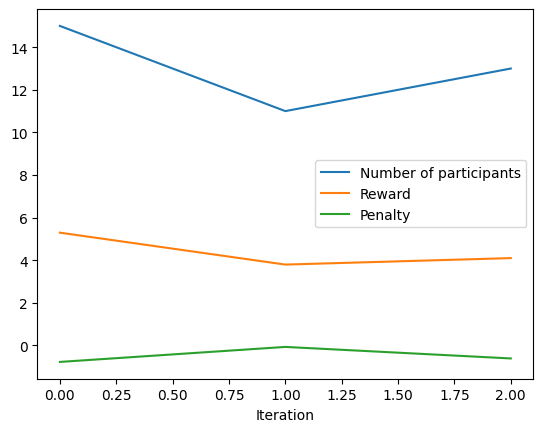

In [ ]:
import random
import matplotlib.pyplot as plt
import pandas as pd

num_followers = 15
min_reputation = 0
max_reputation = 6
reward_range = (1, 6)
penalty_range = (-1.0, 0.0)
optimal_participants = 13
max_iterations = 100

# Read the dataset file
dataset_file = "/content/Dataset for incentive-15 nodes.csv"
df = pd.read_csv(dataset_file)

# Extract columns from the dataset
follower_ids = df["Node-ID"].tolist()
cpu_utilization = df["CPU-Utilization"].tolist()
memory_usage = df["Memory-Usage"].tolist()
reputation_scores = df["Reputation value"].tolist()

# Initialize the number of participants to 0 and create empty lists to store the results
num_participants = 0
rewards = []
penalties = []
num_accepts = []
behaviors = []
participation_levels = []  # New list to store the level of participation

# Loop until the optimal number of participants is reached or the maximum number of iterations is reached
for iteration in range(max_iterations):
    # Generate a new reward and penalty score for the leader
    reward = random.uniform(*reward_range)
    penalty = random.uniform(*penalty_range)

    # Determine the behavior of each follower based on their current reputation score and the reward/penalty
    new_scores = []
    behaviors = []
    print(f"Iteration: {iteration + 1}")
    print(f"Reward: {reward:.2f}, Penalty: {penalty:.2f}")
    for j in range(num_followers):
        follower_id = follower_ids[j]
        old_score = reputation_scores[j]

        if old_score == 6:  # Check if the follower's old score is already 6
            new_score = old_score
        else:
            new_score = min(old_score * 0.8 + reward * 0.2, 6)  # Decrease the score only if it's not 6

        new_scores.append(new_score)

        if new_score >= old_score:
            behaviors.append("accept")
        else:
            behaviors.append("reject")

        print(f"Node {follower_id}: CPU utilisation ={cpu_utilization[j]}%, Memory usage={memory_usage[j]}%, New reputation value={new_score:.2f}, Decision={behaviors[j]}")

    # Count the number of followers who accept the job
    num_accept = behaviors.count("accept")
    participation = num_accept / optimal_participants * 100  # Calculate the level of participation
    participation_levels.append(participation)  # Add the level of participation to the list
    print(f"Level of participation: {participation:.2f}%")  # Print the level of participation

    print("----------------------------------------------")
    # Print reward, penalty, and number of participants
    print(f"Reward: {reward:.2f}, Penalty: {penalty:.2f}, Participants: {num_accept}")
    print("----------------------------------------------")

    # Append the results to the corresponding lists
    rewards.append(reward)
    penalties.append(penalty)
    num_accepts.append(num_accept)

    # Update the number of participants and reputation scores if the optimal number of participants is reached
    if num_accept == optimal_participants:
        num_participants = num_accept
        print(f"Reward={reward:.2f} and Penalty={penalty:.2f} is the optimal Nash equilibrium")
        # reputation_scores = new_scores

        break

    elif num_participants < num_accept:
        num_participants = num_accept

# Print the results
if num_participants == optimal_participants:
    print(f"Optimal participants: {num_participants}")
else:
    print(f"Highest number of participants: {num_participants}")

for i in range(len(num_accepts)):
    if num_accepts[i] == num_participants:
        print(f"Reward = {rewards[i]:.2f} and Penalty = {penalties[i]:.2f}")

# Print CPU utilization, memory usage, and reputation score of participating nodes
print("CPU Utilization, Memory Usage, and Reputation of Participating Nodes:")
for j in range(num_followers):
    if behaviors[j] == "accept":
        follower_id = follower_ids[j]
        print(f"Node {follower_id}: CPU={cpu_utilization[j]}%, Memory={memory_usage[j]}%, Reputation={reputation_scores[j]}")
print(f"Level of participation: {participation:.2f}%")
fig, ax = plt.subplots()
ax.plot(range(len(num_accepts)), num_accepts, label="Number of participants")
ax.plot(range(len(rewards)), rewards, label="Reward")
ax.plot(range(len(penalties)), penalties, label="Penalty")
# ax.plot(range(len(participation_levels)), participation_levels, label="Participation Level")  # Plot participation levels
ax.set_xlabel("Iteration")
# ax.set_ylabel("Number of participants / Level of participation")
ax.legend()
plt.show()
